In [1]:
%load_ext jupyter_ai_magics

In [9]:
%%ai chatgpt
JavaScriptで"hello world"を出力してください

```javascript
console.log("hello world");
```

In [15]:
%ai help

Usage: %%ai [OPTIONS] [MODEL_ID]

  Invokes a language model identified by MODEL_ID, with the prompt being
  contained in all lines after the first. Both local model IDs and global
  model IDs (with the provider ID explicitly prefixed, followed by a colon)
  are accepted.

  To view available language models, please run `%ai list`.

Options:
  -f, --format [code|html|image|json|markdown|math|md|text]
                                  IPython display to use when rendering
                                  output. [default="markdown"]
  -n, --region-name TEXT          AWS region name, e.g. 'us-east-1'. Required
                                  for SageMaker provider; does nothing with
                                  other providers.
  -q, --request-schema TEXT       The JSON object the endpoint expects, with
                                  the prompt being substituted into any value
                                  that matches the string literal '<prompt>'.
                       

In [16]:
%%ai chatgpt -f code
write python code that print current date time


In [ ]:
from datetime import datetime
print(datetime.now())

In [17]:
import datetime
print(datetime.datetime.now())

2025-04-14 22:44:10.499983


In [18]:
%%ai chatgpt -f code
scikit-learnから提供されているカリフォルニアの住宅価格データセット(fetch_california_housing)を使います。
目的変数はyに、特徴量はXに格納して下さい。
データ理解のために、データの基本統計量の確認、データの可視化と探索的データ分析をして下さい。

X Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     

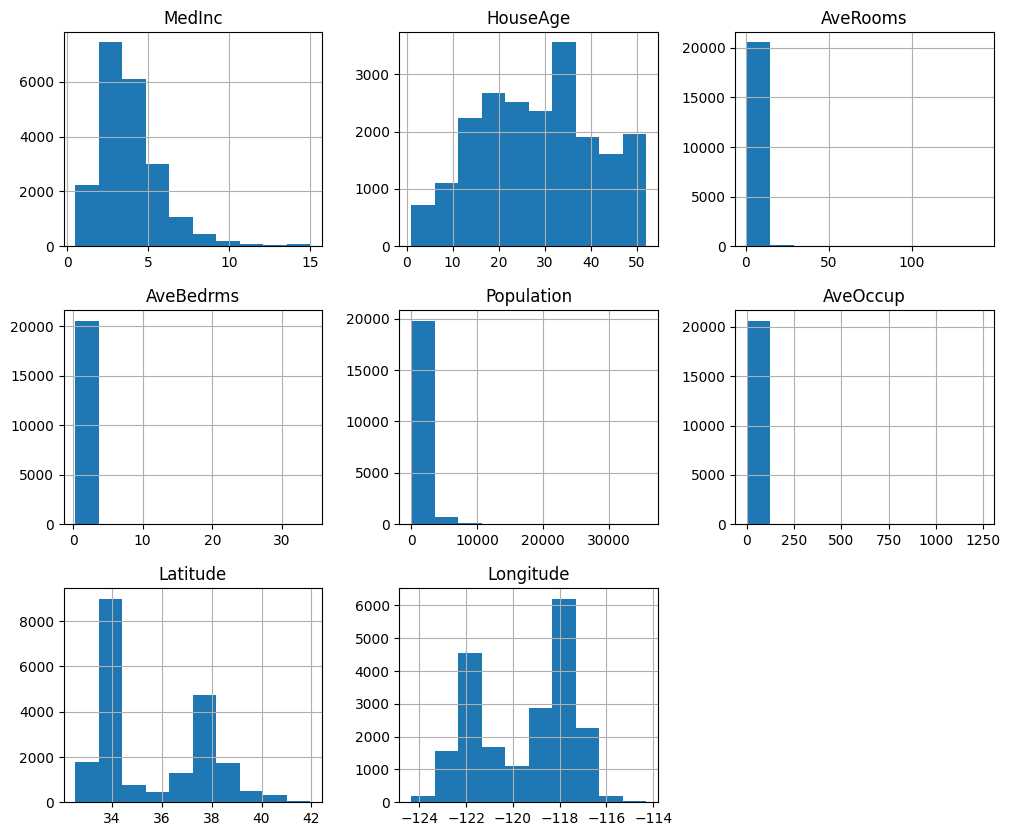

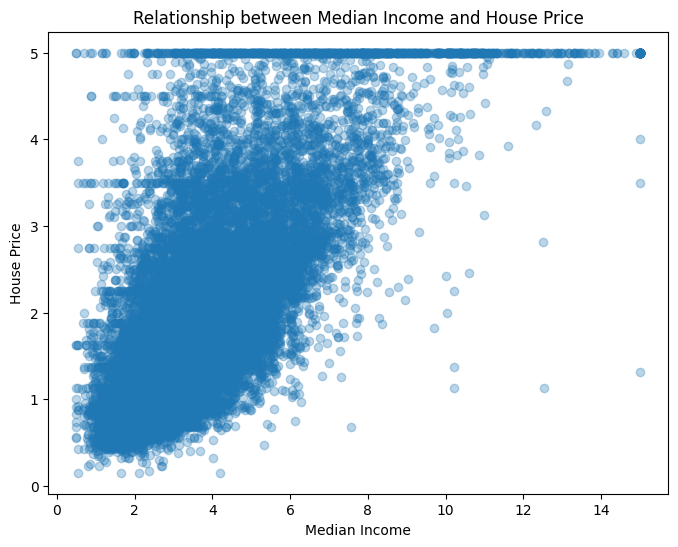

In [19]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

# データセットの読み込み
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 基本統計量の確認
X_stats = X.describe()
y_stats = pd.Series(y).describe()
print("X Statistics:")
print(X_stats)
print("\nY Statistics:")
print(y_stats)

# 特徴量と目的変数の可視化
X.hist(figsize=(12, 10))
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X['MedInc'], y, alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Relationship between Median Income and House Price')
plt.show()

In [20]:
%%ai chatgpt -f code
目的変数と特徴量の相関行列の可視化、目的変数の分布の可視化、特徴量の間の散布図行列の可視化、目的変数と特徴量の散布図の可視化

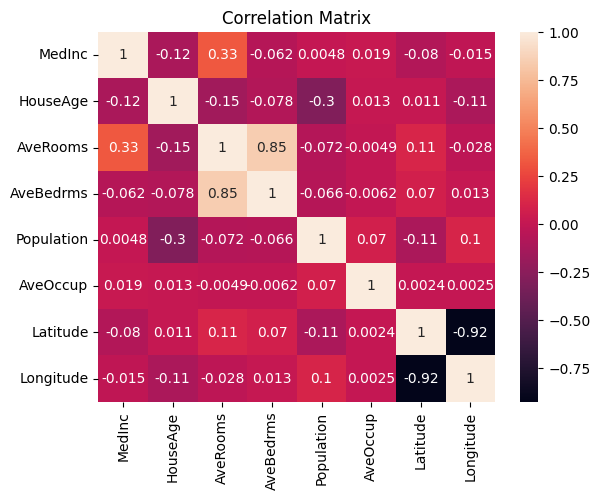

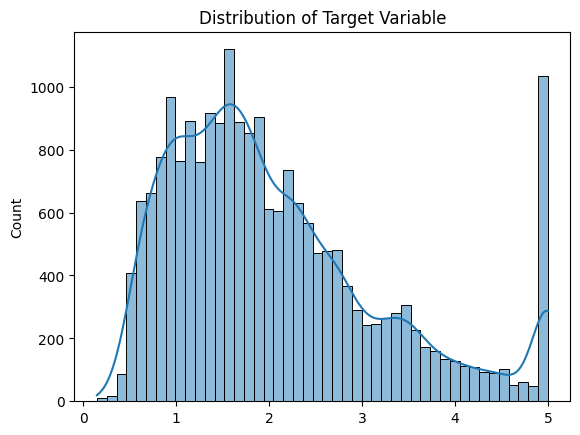

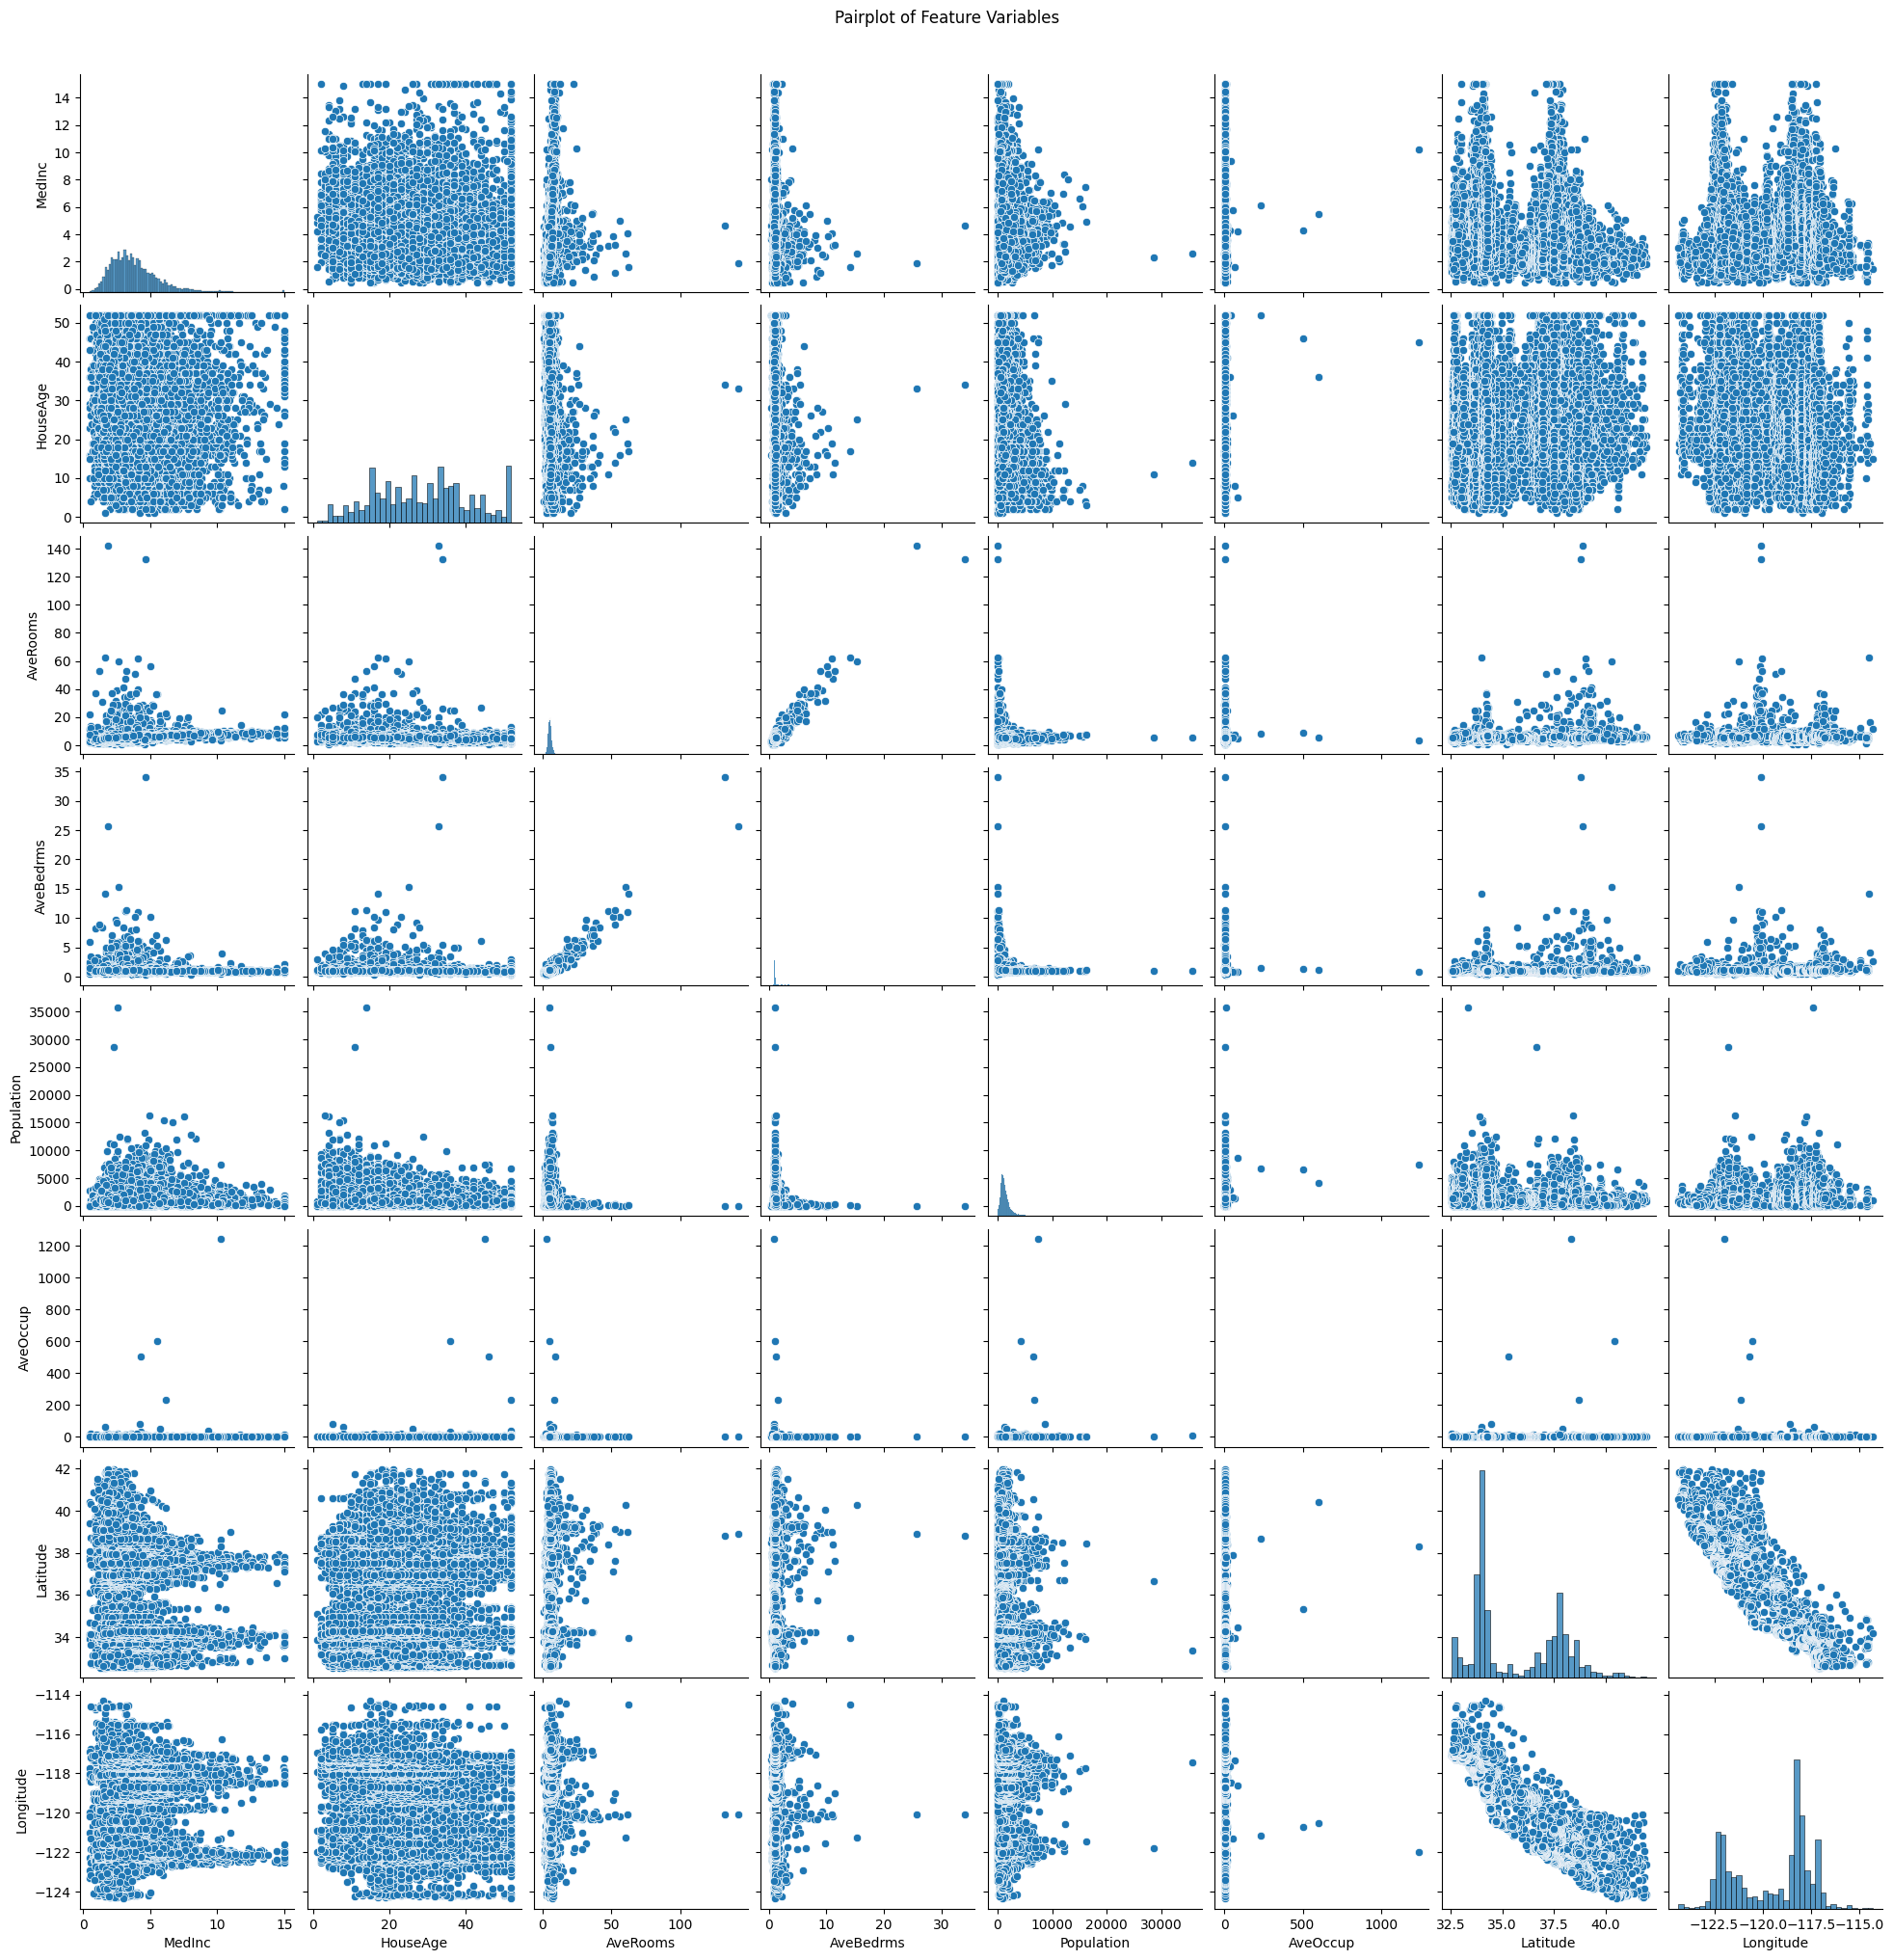

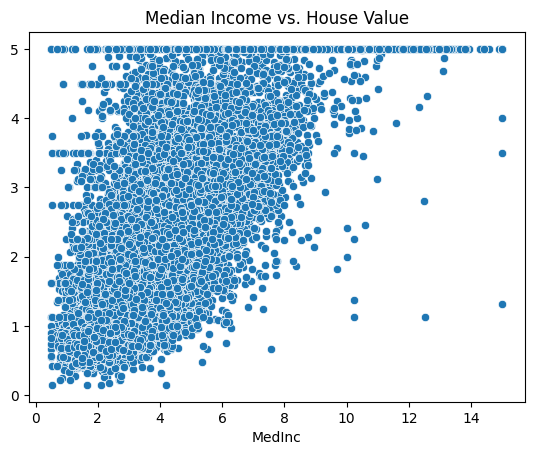

In [21]:
### EDA

# Correlation matrix visualization
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable visualization
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot of feature variables
sns.pairplot(X)
plt.suptitle('Pairplot of Feature Variables', y=1.02)
plt.show()

# Scatter plot of target variable against selected feature variables
sns.scatterplot(x=X['MedInc'], y=y)
plt.title('Median Income vs. House Value')
plt.show()

In [27]:
%%ai chatgpt -f code
scikit-learnから提供されているカリフォルニアの住宅価格データセット(fetch_california_housing)を使います。
目的変数はyに、特徴量はXに格納して下さい。
重回帰分析をして、結果を表示してください。主要な統計量と散布図（予測も表示）を示してください。

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064164
R-squared: 0.5757877060324511


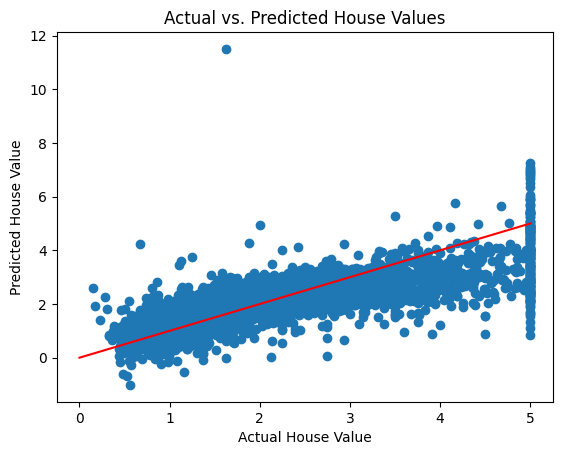

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Calculate R-squared value
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

# Plot actual vs. predicted values
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs. Predicted House Values')
plt.show()